In [1]:
import scipy
import sys

sys.path.append("./src/")
import pycvxcluster.pycvxcluster
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [2]:
# ============
# Generate datasets.
# ============
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
datasets_ = [noisy_circles, noisy_moons, varied, aniso, blobs, no_structure]

/var/folders/6h/d7ddv5f12t7db6t_9pwd3b2r0000gn/T/ipykernel_99212/2194862413.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap="viridis")


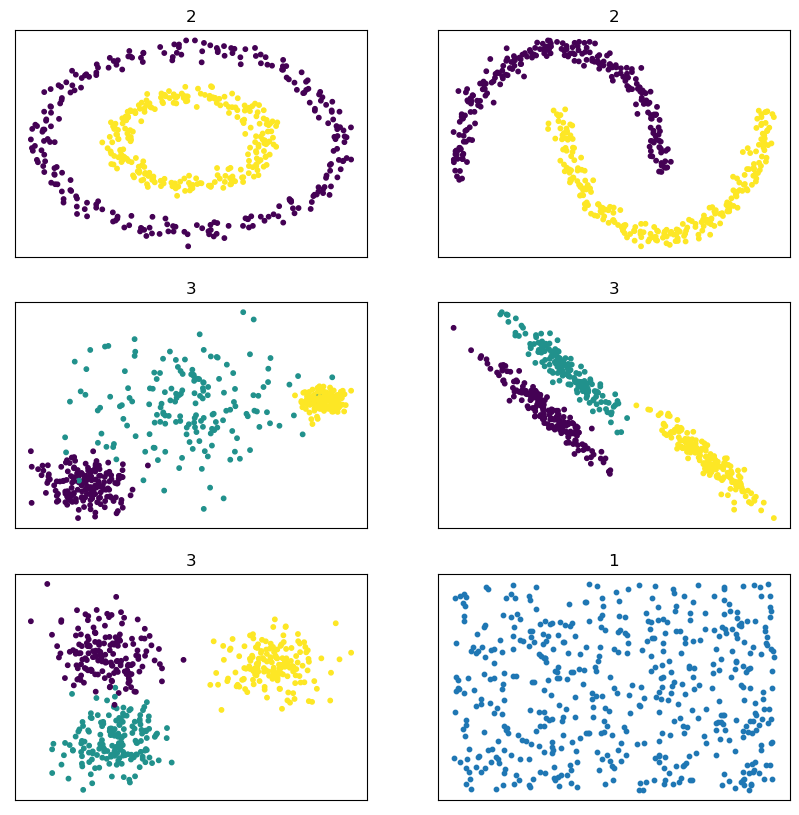

In [3]:
# Plot the generated data
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()
for ax, dataset in zip(axes, datasets_):
    X, y = dataset
    ax.scatter(X[:, 0], X[:, 1], s=10, c=y, cmap="viridis")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title("{}".format(len(np.unique(y))))

In [6]:
data[0].shape

(500, 2)

500
Computing weight matrix...
Weight matrix computed in 0.02385774999856949 seconds.
Starting SSNAL...
Starting ADMM...
ADMM finished in 0.17030820797663182 seconds.
Termination status: Successful convergence
SSNAL terminated in 0.17239349998999387 seconds.
Status: converged, Iterations: 1
Clustering completed in 0.19625124998856336 seconds.
500
Computing weight matrix...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/admm.py:22: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)


Weight matrix computed in 0.020682250033132732 seconds.
Starting SSNAL...
Starting ADMM...
ADMM finished in 0.6550122500630096 seconds.
Termination status: Successful convergence
SSNAL terminated in 0.6574607499642298 seconds.
Status: converged, Iterations: 1
Clustering completed in 0.6781429999973625 seconds.
500
Computing weight matrix...
Weight matrix computed in 0.021310667041689157 seconds.
Starting SSNAL...
Starting ADMM...
ADMM finished in 0.10488875000737607 seconds.
Termination status: Successful convergence
SSNAL terminated in 0.1369354580529034 seconds.
Status: converged, Iterations: 3
Clustering completed in 0.15824612509459257 seconds.
500
Computing weight matrix...
Weight matrix computed in 0.021710957982577384 seconds.
Starting SSNAL...
Starting ADMM...
ADMM finished in 0.5173455830663443 seconds.
Termination status: Successful convergence
SSNAL terminated in 0.5241397080244496 seconds.
Status: converged, Iterations: 1
Clustering completed in 0.545850666007027 seconds.
5

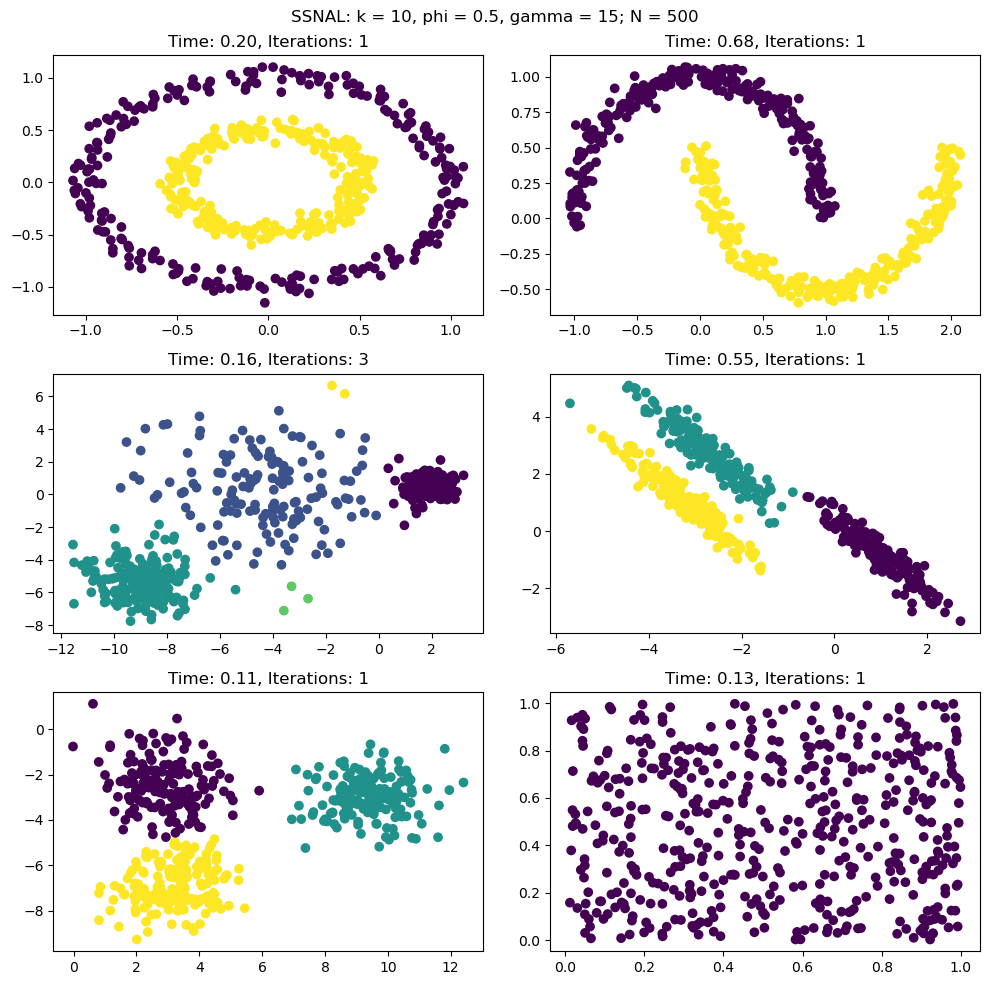

In [3]:
ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=15)
times = np.zeros(len(datasets_))
iterations = np.zeros(len(datasets_))
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, data in enumerate(datasets_):
    ssnal.fit(data[0])
    times[i] = ssnal.total_time_
    iterations[i] = ssnal.iter_
    axes[i // 2, i % 2].scatter(data[0][:, 0], data[0][:, 1], c=ssnal.labels_)
    axes[i // 2, i % 2].set_title(
        f"Time: {times[i]:.2f}, Iterations: {iterations[i]:.0f}"
    )
fig.suptitle(
    f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}; N = {n_samples}"
)
plt.tight_layout()
plt.show()

Running for 100 samples----------------------------------
Computing weights...
Weights computed in 0.00610833300743252 seconds.
Starting SSNAL...
SSNAL terminated in 0.0386535000288859 seconds.
Status: converged, Iterations: 6
Clustering completed in 0.04476183303631842 seconds.
Computing weights...
Weights computed in 0.005127666983753443 seconds.
Starting SSNAL...
SSNAL terminated in 0.036376875010319054 seconds.
Status: converged, Iterations: 6
Clustering completed in 0.0415045419940725 seconds.
Computing weights...
Weights computed in 0.0053526670089922845 seconds.
Starting SSNAL...
SSNAL terminated in 0.03643729200121015 seconds.
Status: converged, Iterations: 6
Clustering completed in 0.04178995901020244 seconds.
----------------------------------
Running for 500 samples----------------------------------
Computing weights...
Weights computed in 0.024097541987430304 seconds.
Starting SSNAL...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:343: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


SSNAL terminated in 0.08552341698668897 seconds.
Status: converged, Iterations: 8
Clustering completed in 0.10962095897411928 seconds.
Computing weights...
Weights computed in 0.024221832980401814 seconds.
Starting SSNAL...
SSNAL terminated in 0.07959012500941753 seconds.
Status: converged, Iterations: 8
Clustering completed in 0.10381195798981935 seconds.
Computing weights...
Weights computed in 0.024017042014747858 seconds.
Starting SSNAL...
SSNAL terminated in 0.0788463749922812 seconds.
Status: converged, Iterations: 8
Clustering completed in 0.10286341700702906 seconds.
----------------------------------
Running for 1000 samples----------------------------------
Computing weights...
Weights computed in 0.06182750000152737 seconds.
Starting SSNAL...
SSNAL terminated in 0.16244408302009106 seconds.
Status: converged, Iterations: 9
Clustering completed in 0.22427158302161843 seconds.
Computing weights...
Weights computed in 0.045394791988655925 seconds.
Starting SSNAL...
SSNAL termin

/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/helpers/ssnal.py:442: RuntimeWarning: invalid value encountered in double_scalars
  dualinf_ratio = dualinf_hist[itersub] / dualinf_hist[itersub - 1]


SSNAL terminated in 2.680250375007745 seconds.
Status: converged, Iterations: 14
Clustering completed in 3.160412333032582 seconds.
Computing weights...
Weights computed in 0.5028147920384072 seconds.
Starting SSNAL...
SSNAL terminated in 2.853162292041816 seconds.
Status: converged, Iterations: 14
Clustering completed in 3.355977084080223 seconds.
Computing weights...
Weights computed in 0.5132251660106704 seconds.
Starting SSNAL...
SSNAL terminated in 2.7943217499996535 seconds.
Status: converged, Iterations: 14
Clustering completed in 3.307546916010324 seconds.
----------------------------------
Running for 20000 samples----------------------------------
Computing weights...
Weights computed in 1.016681624983903 seconds.
Starting SSNAL...
SSNAL terminated in 11.975015499978326 seconds.
Status: converged, Iterations: 18
Clustering completed in 12.99169712496223 seconds.
Computing weights...
Weights computed in 0.9964145420235582 seconds.
Starting SSNAL...
SSNAL terminated in 11.50449

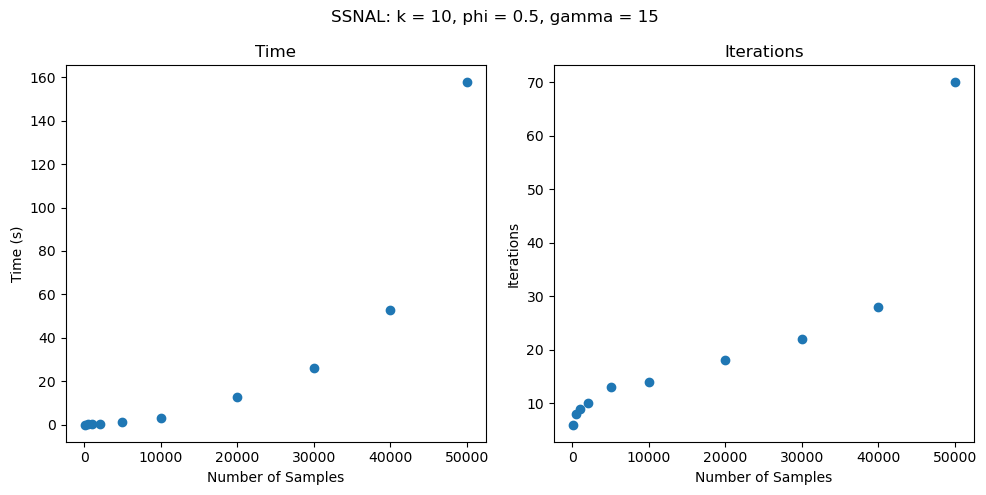

In [7]:
sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000]
times = np.zeros(len(sizes))
iterations = np.zeros(len(sizes))
n_fits = 3
for j, n in enumerate(sizes):
    print(f"Running for {n} samples----------------------------------")
    for i in range(n_fits):
        X, y = datasets.make_blobs(n_samples=n, centers=5, random_state=random_state)
        ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=15)
        labels = ssnal.fit_predict(X)
        times[j] += ssnal.total_time_
        iterations[j] += ssnal.iter_
    times[j] /= n_fits
    iterations[j] /= n_fits
    print("----------------------------------")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(sizes, times)
axes[0].set_title("Time")
axes[0].set_xlabel("Number of Samples")
axes[0].set_ylabel("Time (s)")
axes[1].scatter(sizes, iterations)
axes[1].set_title("Iterations")
axes[1].set_xlabel("Number of Samples")
axes[1].set_ylabel("Iterations")
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}, gamma = {ssnal.gamma}")
plt.tight_layout()
plt.show()

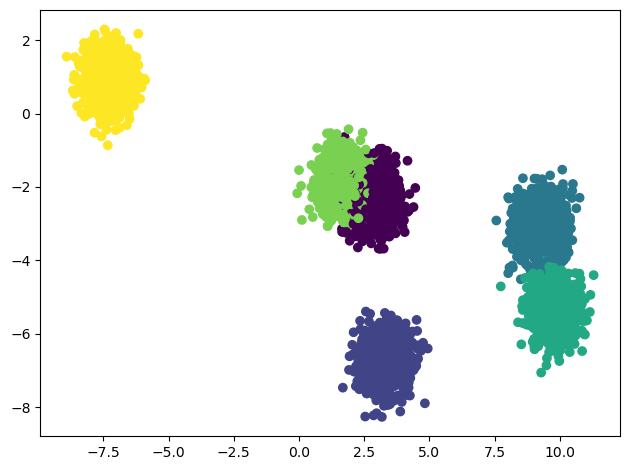

In [6]:
# generate 6 blobs and plot the true clusters
n_samples = 5000
blobs = datasets.make_blobs(
    n_samples=n_samples, random_state=seed, centers=6, cluster_std=0.5
)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(blobs[0][:, 0], blobs[0][:, 1], c=blobs[1])
plt.tight_layout()
plt.show()

Computing weights...
Weights computed in 0.04356195800937712 seconds.
Starting SSNAL...
SSNAL terminated in 0.3058887500083074 seconds.
Status: converged, Iterations: 11
Clustering completed in 0.3494507080176845 seconds.
Computing weights...
Weights computed in 0.04499374993611127 seconds.
Starting SSNAL...
SSNAL terminated in 0.27383574994746596 seconds.
Status: converged, Iterations: 11
Clustering completed in 0.3188294998835772 seconds.
Computing weights...
Weights computed in 0.04737225000280887 seconds.
Starting SSNAL...
SSNAL terminated in 0.2762446249835193 seconds.
Status: converged, Iterations: 11
Clustering completed in 0.3236168749863282 seconds.
Computing weights...
Weights computed in 0.04430595797020942 seconds.
Starting SSNAL...
SSNAL terminated in 0.33698566700331867 seconds.
Status: converged, Iterations: 13
Clustering completed in 0.3812916249735281 seconds.
Computing weights...
Weights computed in 0.04384870792273432 seconds.
Starting SSNAL...
SSNAL terminated in 0.

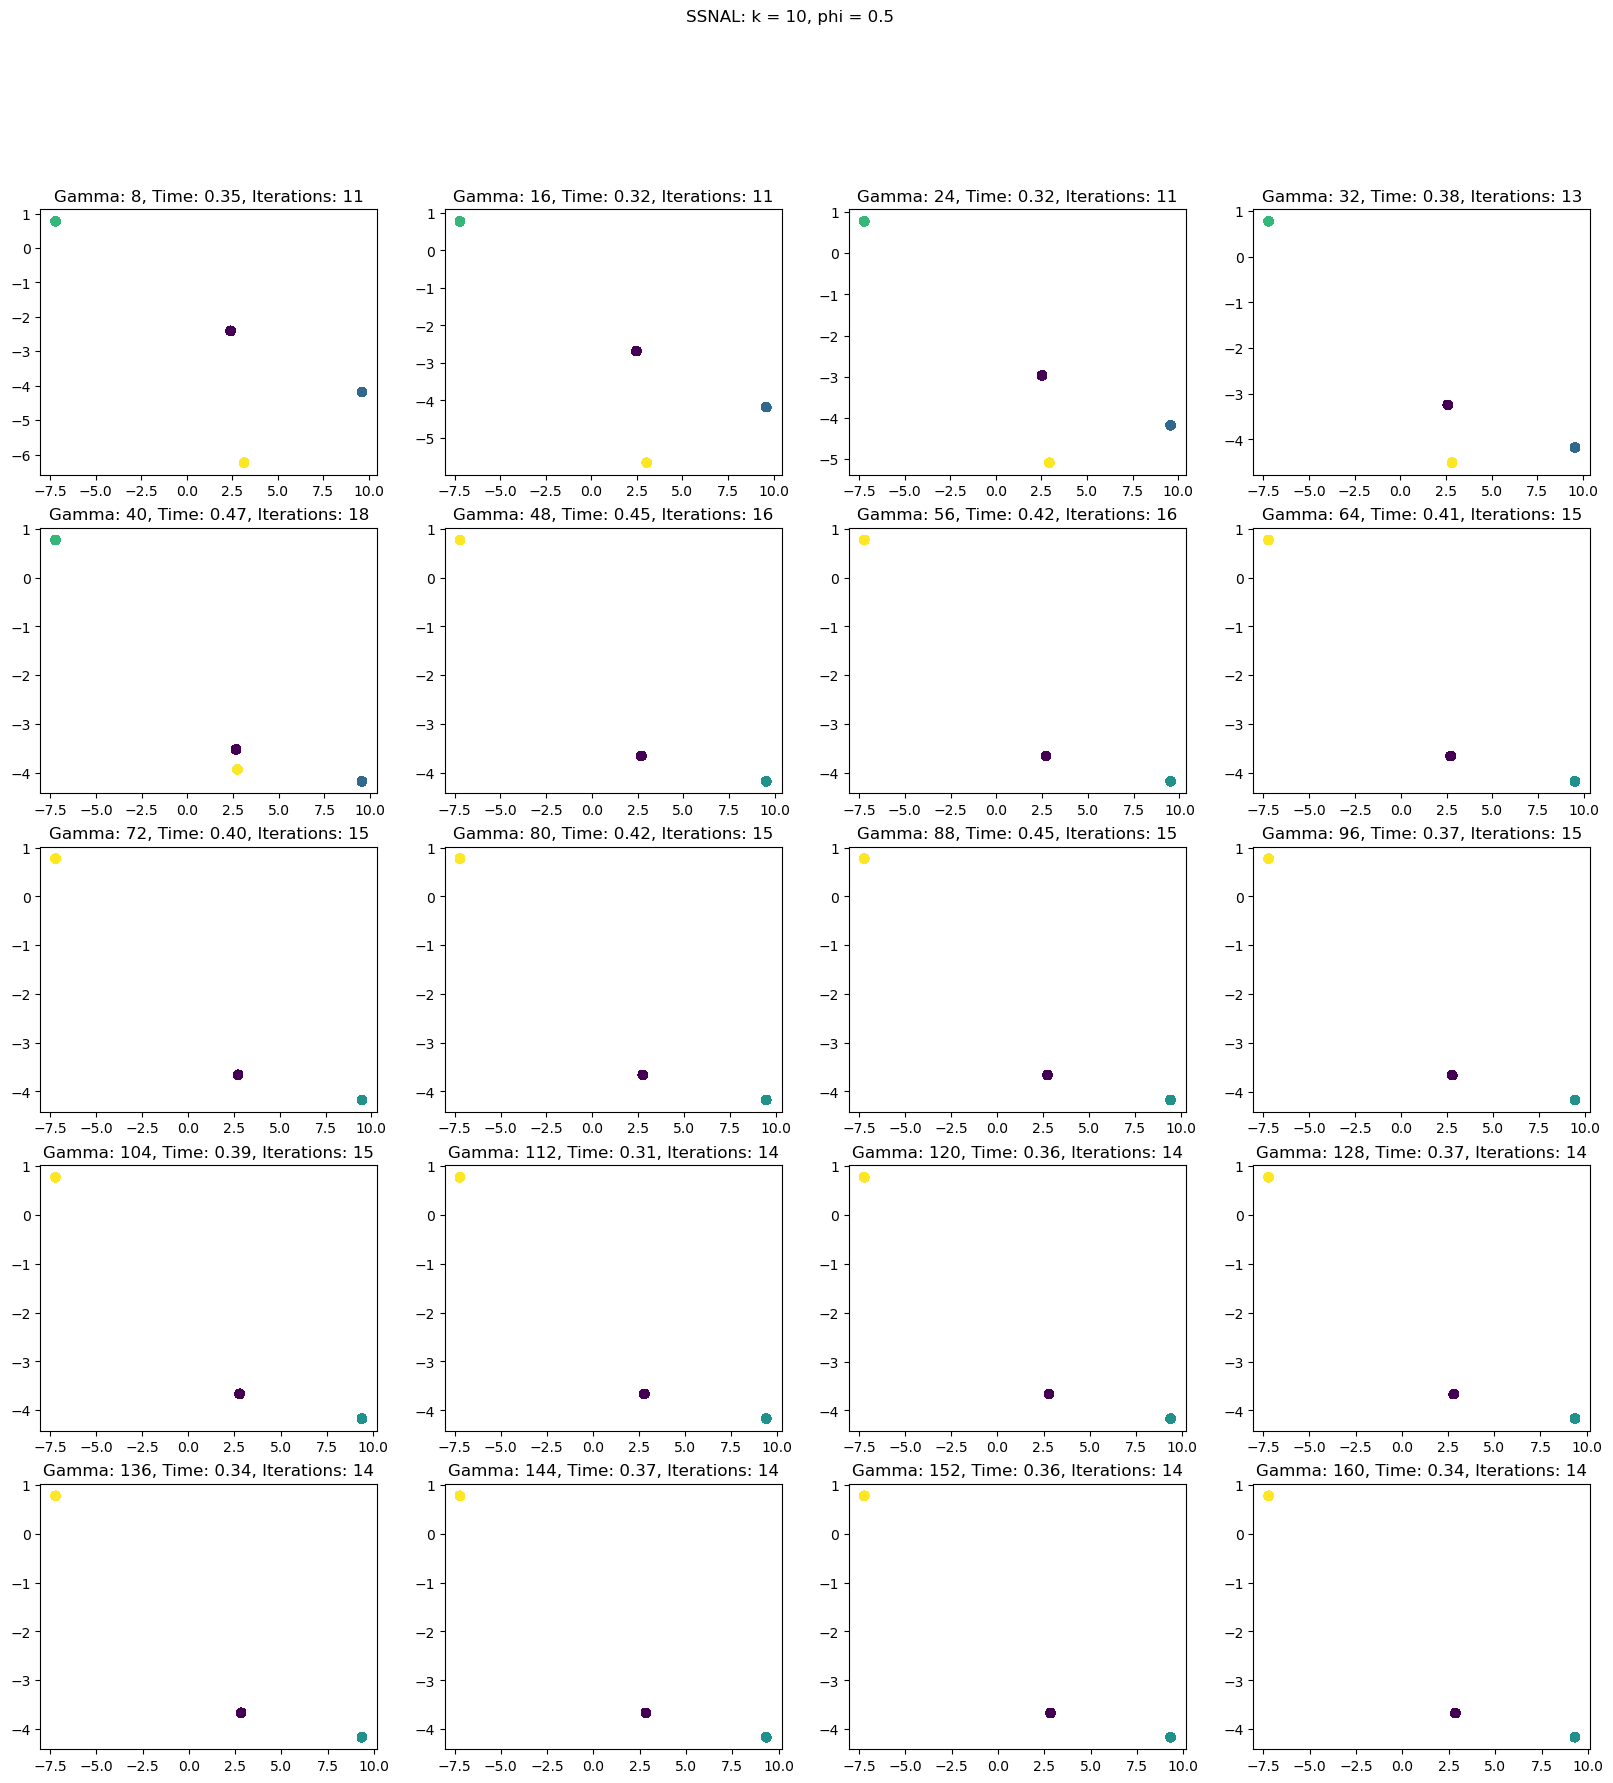

In [14]:
# run ssnal on the blobs with varying gamma from 1 to 20 and plot the results
fig, axes = plt.subplots(5, 4, figsize=(10, 10))
fig.set_size_inches(20, 20)
centers = np.zeros((20, n_samples, 2))
for i in range(20):
    ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=(i+1)*8)
    labels = ssnal.fit_predict(blobs[0], save_centers=True)
    centers[i, :, :] = ssnal.centers_.T
    axes[i // 4, i % 4].scatter(ssnal.centers_[0, :], ssnal.centers_[1, :], c=labels)
    axes[i // 4, i % 4].set_title(
        f"Gamma: {(i+1)*8}, Time: {ssnal.total_time_:.2f}, Iterations: {ssnal.iter_:.0f}"
    )
fig.suptitle(f"SSNAL: k = {ssnal.k}, phi = {ssnal.phi}")
plt.show()

Computing weights...
Weights computed in 0.22581087495200336 seconds.
Starting ADMM...
ADMM finished in 153.43799925001804 seconds.
Termination status: Maximum number of iterations reached
Clustering completed in 153.66381012497004 seconds.
Computing weights...
Weights computed in 0.3034206669544801 seconds.
Starting ADMM...
ADMM finished in 142.45696841704194 seconds.
Termination status: Maximum number of iterations reached
Clustering completed in 142.76038908399642 seconds.
Computing weights...
Weights computed in 0.22730958298780024 seconds.
Starting ADMM...
ADMM finished in 15.197908957954496 seconds.
Termination status: Successful convergence
Clustering completed in 15.425218540942296 seconds.
Computing weights...
Weights computed in 0.22685404191724956 seconds.
Starting ADMM...
ADMM finished in 8.31134783406742 seconds.
Termination status: Successful convergence
Clustering completed in 8.538201875984669 seconds.
Computing weights...
Weights computed in 0.2279325840063393 seconds.

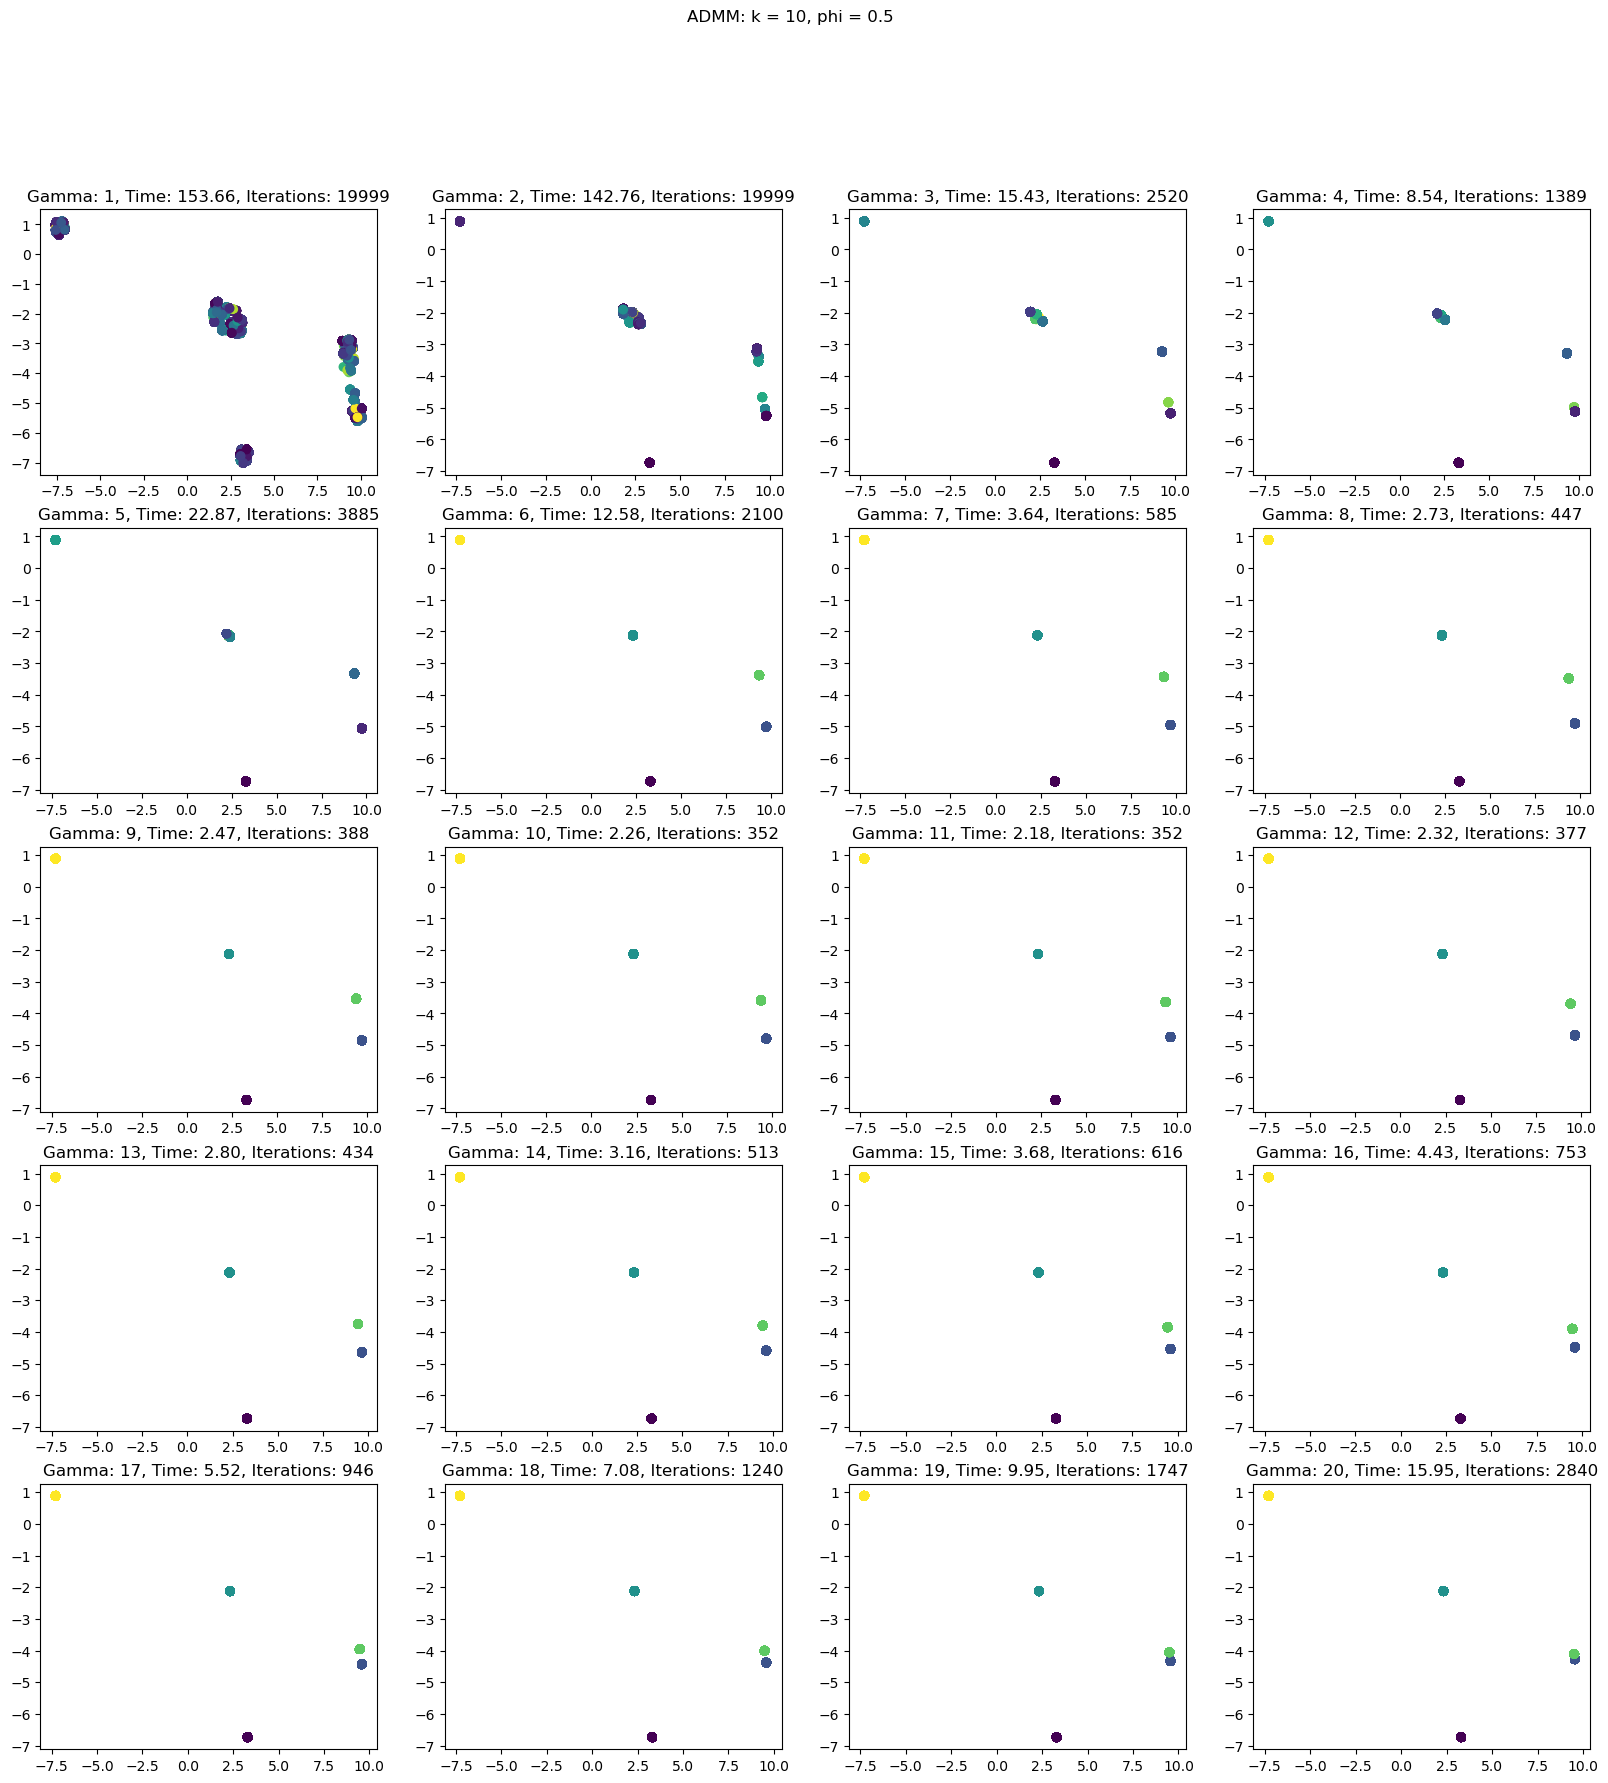

In [8]:
# run ADMM on the blobs with varying gamma from 1 to 20 and plot the results
fig, axes = plt.subplots(5, 4, figsize=(10, 10))
fig.set_size_inches(20, 20)
centers = np.zeros((20, n_samples, 2))
for i in range(20):
    admm = pycvxcluster.pycvxcluster.ADMM(k=10, phi=0.5, gamma=(i + 1))
    labels = admm.fit_predict(blobs[0], save_centers=True)
    centers[i, :, :] = admm.centers_.T
    axes[i // 4, i % 4].scatter(admm.centers_[0, :], admm.centers_[1, :], c=labels)
    axes[i // 4, i % 4].set_title(
        f"Gamma: {i+1}, Time: {admm.total_time_:.2f}, Iterations: {admm.iter_:.0f}"
    )
fig.suptitle(f"ADMM: k = {admm.k}, phi = {admm.phi}")
plt.show()

Computing weights...
Weights computed in 0.3042879169806838 seconds.
Starting SSNAL...
SSNAL terminated in 1.9179453749675304 seconds.
Status: converged, Iterations: 18
Clustering completed in 2.222233291948214 seconds.
Computing weights...
Weights computed in 0.24318137497175485 seconds.
Starting SSNAL...
SSNAL terminated in 1.9099922500317916 seconds.
Status: converged, Iterations: 18
Clustering completed in 2.1531736250035465 seconds.
Computing weights...
Weights computed in 0.27566191693767905 seconds.
Starting SSNAL...
SSNAL terminated in 1.63943099998869 seconds.
Status: converged, Iterations: 14
Clustering completed in 1.915092916926369 seconds.
Computing weights...
Weights computed in 0.2902159160003066 seconds.
Starting SSNAL...
SSNAL terminated in 1.79205466597341 seconds.
Status: converged, Iterations: 13
Clustering completed in 2.0822705819737166 seconds.
Computing weights...
Weights computed in 0.3827261249534786 seconds.
Starting SSNAL...
SSNAL terminated in 1.77651691704

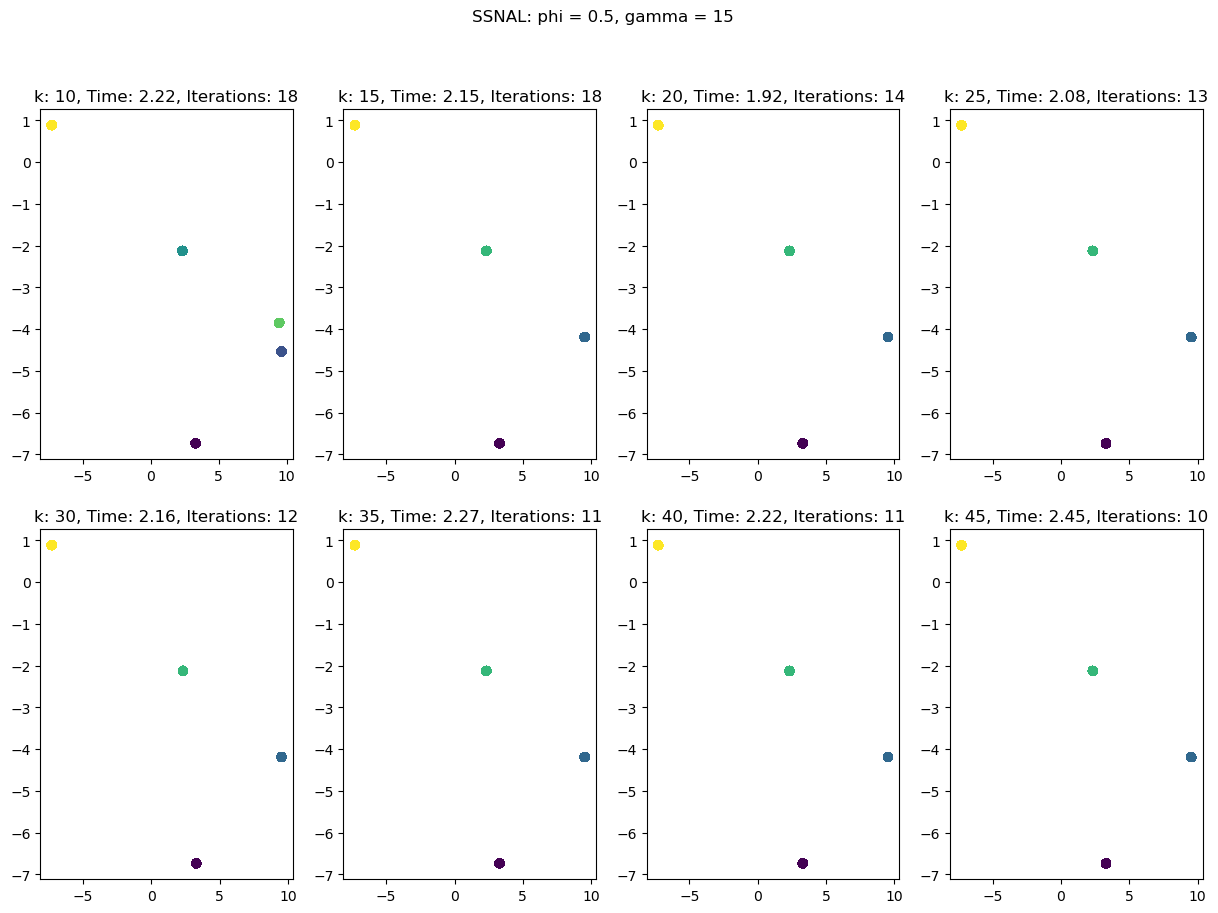

In [12]:
# check how the clustering path changes with k from 10 to 45 by 5 for ssnal
fig, axes = plt.subplots(2, 4, figsize=(8, 8))
fig.set_size_inches(15, 10)
centers = np.zeros((8, n_samples, 2))
for i in range(8):
    ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10 + i * 5, phi=0.5, gamma=15)
    labels = ssnal.fit_predict(blobs[0], save_centers=True)
    centers[i, :, :] = ssnal.centers_.T
    axes[i // 4, i % 4].scatter(ssnal.centers_[0, :], ssnal.centers_[1, :], c=labels)
    axes[i // 4, i % 4].set_title(
        f"k: {10 + i * 5}, Time: {ssnal.total_time_:.2f}, Iterations: {ssnal.iter_:.0f}"
    )
fig.suptitle(f"SSNAL: phi = {ssnal.phi}, gamma = {ssnal.gamma}")
plt.show()

Computing weights...
Weights computed in 0.2349398749647662 seconds.
Starting ADMM...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/admm.py:22: CholmodTypeConversionWarning: converting matrix of class csr_matrix to CSC format
  factor = cholesky(eye(n) + sigma * A @ A.T)


ADMM finished in 3.602372041903436 seconds.
Termination status: Successful convergence
Clustering completed in 3.8373119168682024 seconds.
Computing weights...
Weights computed in 0.23331833409611136 seconds.
Starting ADMM...
ADMM finished in 3.4940847910474986 seconds.
Termination status: Successful convergence
Clustering completed in 3.72740312514361 seconds.
Computing weights...
Weights computed in 0.24628320790361613 seconds.
Starting ADMM...
ADMM finished in 2.2442655420163646 seconds.
Termination status: Successful convergence
Clustering completed in 2.4905487499199808 seconds.
Computing weights...
Weights computed in 0.3580100000835955 seconds.
Starting ADMM...
ADMM finished in 1.8538638330064714 seconds.
Termination status: Successful convergence
Clustering completed in 2.211873833090067 seconds.
Computing weights...
Weights computed in 0.2882639589952305 seconds.
Starting ADMM...
ADMM finished in 1.419011541060172 seconds.
Termination status: Successful convergence
Clustering 

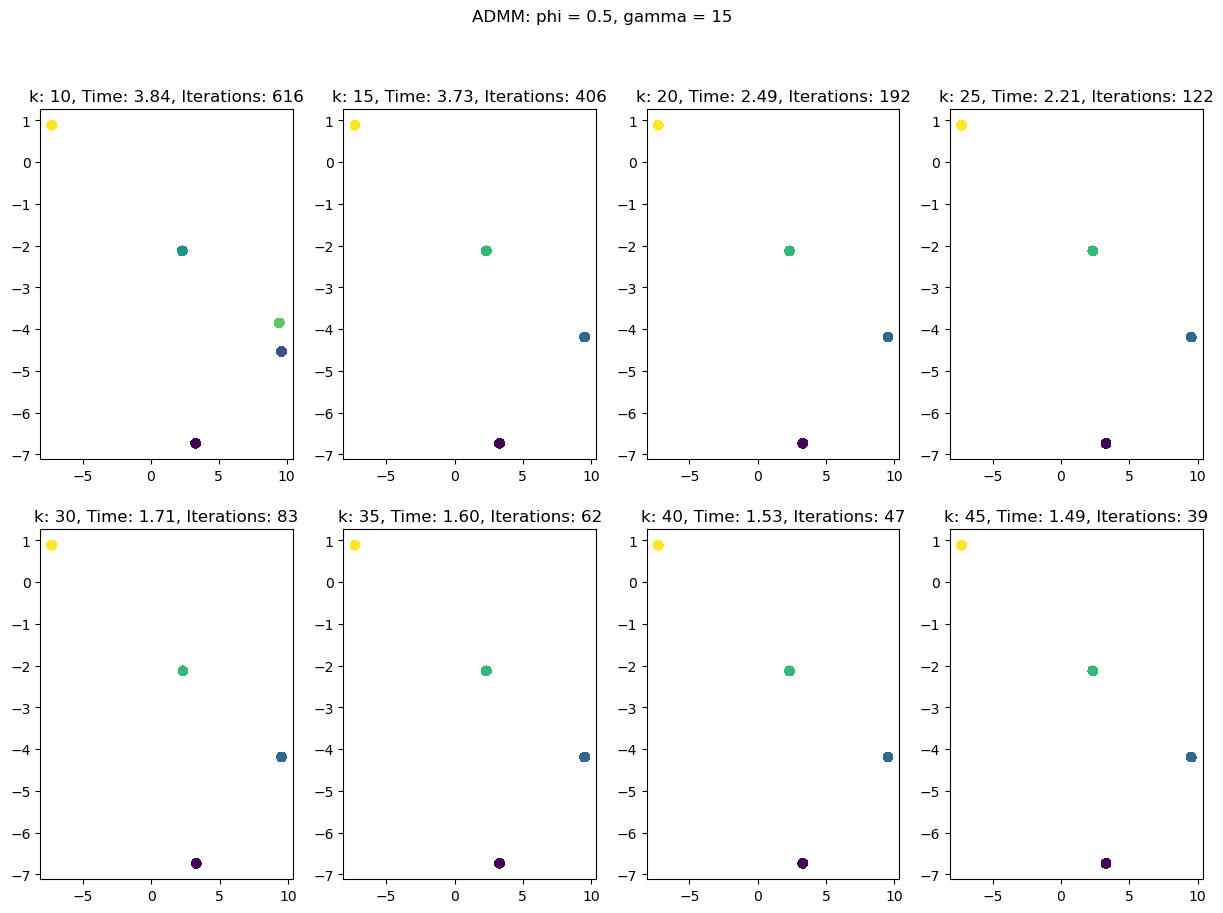

In [13]:
# repeat for admm
fig, axes = plt.subplots(2, 4, figsize=(8, 8))
fig.set_size_inches(15, 10)
centers = np.zeros((8, n_samples, 2))
for i in range(8):
    admm = pycvxcluster.pycvxcluster.ADMM(k=10 + i * 5, phi=0.5, gamma=15)
    labels = admm.fit_predict(blobs[0], save_centers=True)
    centers[i, :, :] = admm.centers_.T
    axes[i // 4, i % 4].scatter(admm.centers_[0, :], admm.centers_[1, :], c=labels)
    axes[i // 4, i % 4].set_title(
        f"k: {10 + i * 5}, Time: {admm.total_time_:.2f}, Iterations: {admm.iter_:.0f}"
    )
fig.suptitle(f"ADMM: phi = {admm.phi}, gamma = {admm.gamma}")
plt.show()

In [ ]:
#plot both ADMM and SSNAL running time vs number of samples
sizes = [100, 500, 1000, 2000, 5000, 10000, 20000]
times_admm = np.zeros(len(sizes))
times_ssnal = np.zeros(len(sizes))
iterations_admm = np.zeros(len(sizes))
iterations_ssnal = np.zeros(len(sizes))
n_fits = 3
for j, n in enumerate(sizes):
    print(f"Running for {n} samples----------------------------------")
    for i in range(n_fits):
        X, y = datasets.make_blobs(n_samples=n, centers=5, random_state=random_state)
        admm = pycvxcluster.pycvxcluster.ADMM(k=10, phi=0.5, gamma=15, verbose=0, maxiter=50000)
        labels = admm.fit_predict(X)
        times_admm[j] += admm.total_time_
        iterations_admm[j] += admm.iter_
        ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=15, verbose=0)
        labels = ssnal.fit_predict(X)
        times_ssnal[j] += ssnal.total_time_
        iterations_ssnal[j] += ssnal.iter_
    times_admm[j] /= n_fits
    iterations_admm[j] /= n_fits
    times_ssnal[j] /= n_fits
    iterations_ssnal[j] /= n_fits
    print("----------------------------------")



In [11]:
iterations_admm

array([ 22.,  27.,  31.,  55., 209., 251., 515.])

In [12]:
iterations_ssnal

array([ 6.,  8.,  9., 10., 13., 14., 18.])

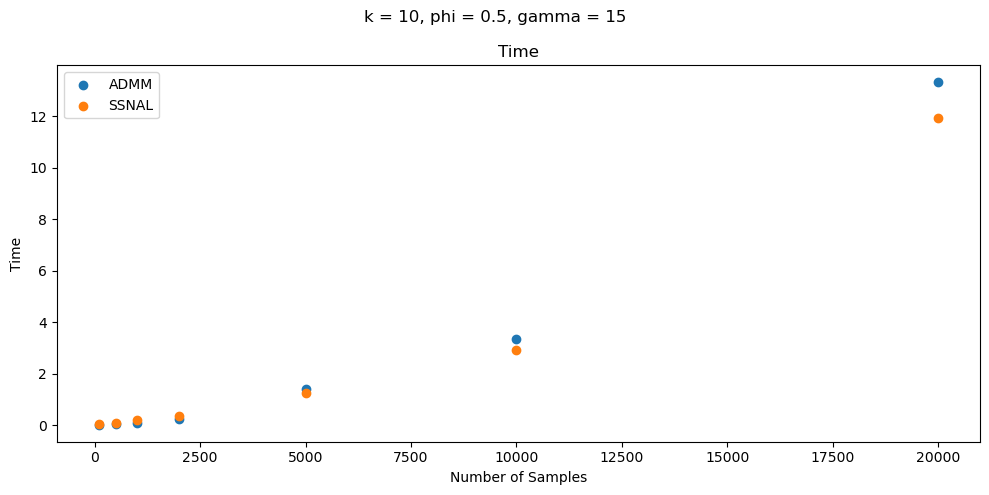

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(sizes, times_admm, label='ADMM')
ax.scatter(sizes, times_ssnal, label='SSNAL')
ax.set_title("Time")
ax.set_xlabel("Number of Samples")
ax.set_ylabel("Time")
ax.legend()
fig.suptitle(f"k = {admm.k}, phi = {admm.phi}, gamma = {admm.gamma}")
plt.tight_layout()
plt.show()

Computing weights...
Weights computed in 0.0475316250231117 seconds.
Starting SSNAL...


/Users/dxli2/Downloads/ConvexClustering/pycvxcluster/./src/pycvxcluster/algos/ssnal.py:308: RuntimeWarning: invalid value encountered in double_scalars
  dual_ratio = dualinf_sub / dualinf_hist[itersub - 1]


SSNAL terminated in 0.28502541698981076 seconds.
Status: converged, Iterations: 11
Clustering completed in 0.33255704201292247 seconds.
Computing weights...
Weights computed in 0.04426004097331315 seconds.
Starting SSNAL...
SSNAL terminated in 0.27471212507225573 seconds.
Status: converged, Iterations: 11
Clustering completed in 0.3189721660455689 seconds.
Computing weights...
Weights computed in 0.044418541016057134 seconds.
Starting SSNAL...
SSNAL terminated in 0.24442741693928838 seconds.
Status: converged, Iterations: 11
Clustering completed in 0.2888459579553455 seconds.
Computing weights...
Weights computed in 0.04375066596549004 seconds.
Starting SSNAL...
SSNAL terminated in 0.23195645899977535 seconds.
Status: converged, Iterations: 11
Clustering completed in 0.2757071249652654 seconds.
Computing weights...
Weights computed in 0.04355337505694479 seconds.
Starting SSNAL...
SSNAL terminated in 0.25439587503205985 seconds.
Status: converged, Iterations: 11
Clustering completed in

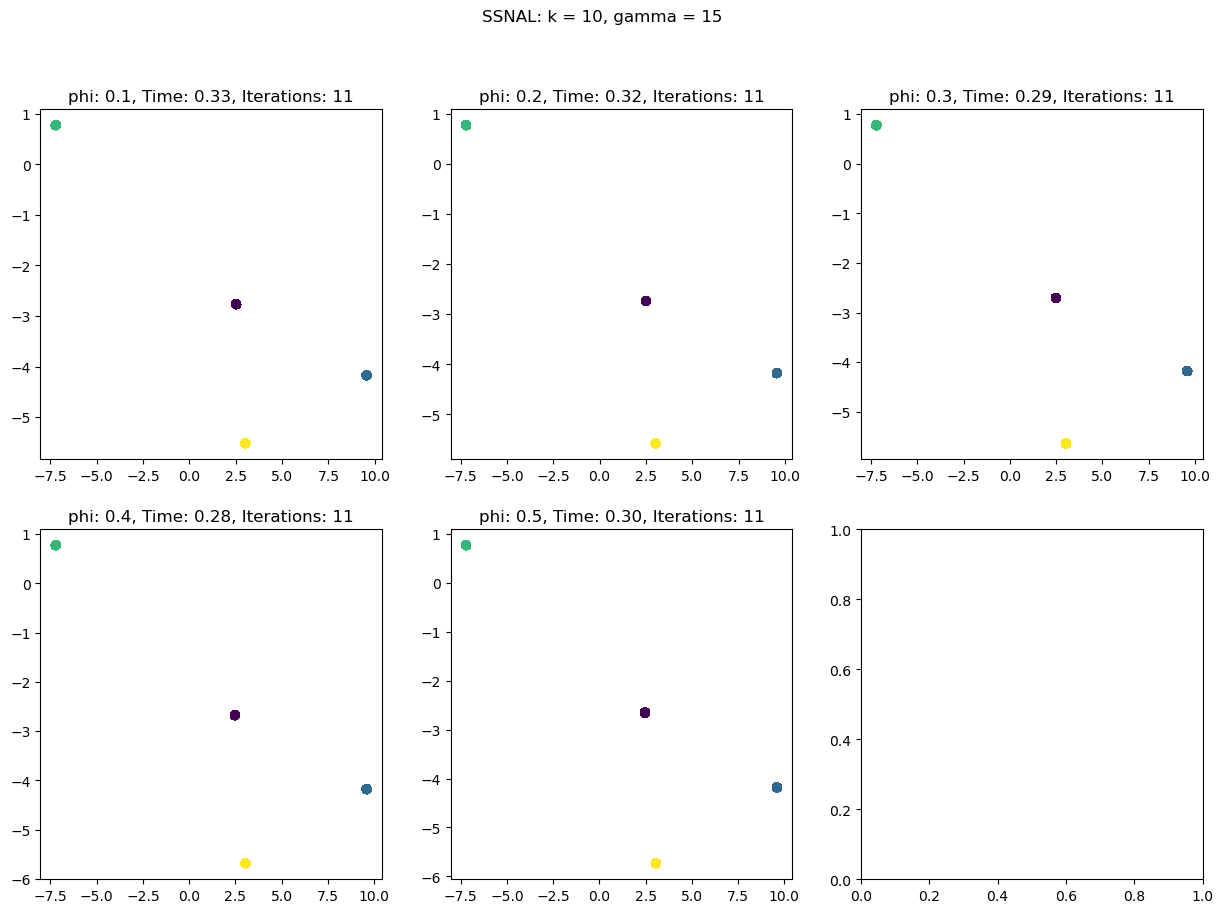

In [9]:
#graph cluster paths varying phi
n_samples = 1000
blobs = datasets.make_blobs(
    n_samples=n_samples, random_state=seed, centers=6, cluster_std=1
)
phis = [0.1, 0.2, 0.3, 0.4, 0.5]
fig, axes = plt.subplots(2, 3, figsize=(8, 8))
fig.set_size_inches(15, 10)
centers = np.zeros((5, n_samples, 2))
for i in range(5):
    ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=phis[i], gamma=15)
    labels = ssnal.fit_predict(blobs[0], save_centers=True)
    centers[i, :, :] = ssnal.centers_.T
    axes[i // 3, i % 3].scatter(ssnal.centers_[0, :], ssnal.centers_[1, :], c=labels)
    axes[i // 3, i % 3].set_title(
        f"phi: {phis[i]}, Time: {ssnal.total_time_:.2f}, Iterations: {ssnal.iter_:.0f}"
    )
fig.suptitle(f"SSNAL: k = {ssnal.k}, gamma = {ssnal.gamma}")
plt.show()


In [ ]:
#plot both ADMM and SSNAL running time vs number of samples
size = 10000
dims = np.arange(1, 10)
times_admm = np.zeros(len(sizes))
times_ssnal = np.zeros(len(sizes))
iterations_admm = np.zeros(len(sizes))
iterations_ssnal = np.zeros(len(sizes))
n_fits = 3
for j, n in enumerate(sizes):
    print(f"Running for {n} samples----------------------------------")
    for i in range(n_fits):
        X, y = datasets.make_blobs(n_samples=n, centers=5, random_state=random_state)
        admm = pycvxcluster.pycvxcluster.ADMM(k=10, phi=0.5, gamma=15, verbose=0, maxiter=50000)
        labels = admm.fit_predict(X)
        times_admm[j] += admm.total_time_
        iterations_admm[j] += admm.iter_
        ssnal = pycvxcluster.pycvxcluster.SSNAL(k=10, phi=0.5, gamma=15, verbose=0)
        labels = ssnal.fit_predict(X)
        times_ssnal[j] += ssnal.total_time_
        iterations_ssnal[j] += ssnal.iter_
    times_admm[j] /= n_fits
    iterations_admm[j] /= n_fits
    times_ssnal[j] /= n_fits
    iterations_ssnal[j] /= n_fits
    print("----------------------------------")

